In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas

from datetime import datetime
from scipy.io import readsav
import pyreadstat

In [8]:
filepath_historical_data = '/Users/wdhakouani/code/MadMax1995bb/powder_alert2.0/raw_data/Hochfuegen_historyDS.csv'
filepath_hist_api = '/Users/wdhakouani/code/MadMax1995bb/powder_alert2.0/raw_data/historical_api.csv'

In [9]:
filepath_v2 = '/Users/wdhakouani/code/MadMax1995bb/powder_alert2.0/raw_data/Alternative_data_v2.csv'
filepath_v3 = '/Users/wdhakouani/code/MadMax1995bb/powder_alert2.0/raw_data/Alternative_data_v3_Davos.csv'

In [11]:
csv_file = filepath_historical_data
df_hist = pd.read_csv(csv_file)
df_hist.head(3)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,283996800,1979-01-01 00:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,274.75,NaN,273.59,272.69,...,NaN,NaN,NaN,NaN,NaN,95,804,Clouds,overcast clouds,04n
1,284000400,1979-01-01 01:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,274.68,NaN,273.67,272.25,...,NaN,NaN,NaN,NaN,NaN,95,804,Clouds,overcast clouds,04n
2,284004000,1979-01-01 02:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,274.63,NaN,273.77,272.43,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n


In [12]:
# csv_file = filepath_v2
# alt2 = pd.read_csv(csv_file)

In [13]:
# csv_file = filepath_v3
# alt3 = pd.read_csv(csv_file, delimiter=';')

In [14]:
csv_file = filepath_hist_api
df_api = pd.read_csv(csv_file)
df_api.head(3)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
0,1979-01-01 00:00:00+00:00,-5.499,92.65972,-6.499,-9.440102,0.1,0.1,0.00,0.47,51.0,...,42.120000,-0.749,-0.649,0.301,2.201,0.316,0.315,0.304,0.367,0.0
1,1979-01-01 01:00:00+00:00,-5.349,94.81615,-6.049,-9.425217,0.2,0.1,0.07,0.47,71.0,...,46.079998,-0.749,-0.649,0.301,2.201,0.316,0.315,0.304,0.367,0.0
2,1979-01-01 02:00:00+00:00,-5.449,95.53807,-6.049,-9.401998,0.5,0.1,0.28,0.47,73.0,...,48.600000,-0.749,-0.649,0.301,2.201,0.316,0.315,0.304,0.367,0.0


# Merging two datasets

In [15]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402861 entries, 0 to 402860
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   402861 non-null  int64  
 1   dt_iso               402861 non-null  object 
 2   timezone             402861 non-null  int64  
 3   city_name            402861 non-null  object 
 4   lat                  402861 non-null  float64
 5   lon                  402861 non-null  float64
 6   temp                 402861 non-null  float64
 7   visibility           4045 non-null    float64
 8   dew_point            402861 non-null  float64
 9   feels_like           402861 non-null  float64
 10  temp_min             402861 non-null  float64
 11  temp_max             402861 non-null  float64
 12  pressure             402861 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

In [16]:
#Keeping columns of interest and renaming date column
df_hist_clean = df_hist[['dt_iso','city_name', 'temp_min', 'temp_max','weather_id', 'weather_main', 'weather_description']]
df_hist_clean = df_hist_clean.rename(columns={'dt_iso':'date'})
df_hist_clean.tail(2)

,date,city_name,temp_min,temp_max,weather_id,weather_main,weather_description
402859,2024-12-08 22:00:00 +0000 UTC,Hochfügen,267.18,269.03,600,Snow,light snow
402860,2024-12-08 23:00:00 +0000 UTC,Hochfügen,267.18,268.97,600,Snow,light snow


In [17]:
#Stripping date string and then removing timezone
df_hist_clean['date'] = df_hist_clean['date'].str.replace(' UTC', '').copy()

In [18]:
#Changing date columns to date format
df_hist_clean['date'] = pd.to_datetime(df_hist_clean['date'])
df_api['date'] = pd.to_datetime(df_api['date'])

In [19]:
#Merged df_api with df_hist_clean
df = df_api.merge(df_hist_clean, on = 'date', how='left')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402861 entries, 0 to 402860
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   date                           402861 non-null  datetime64[ns, UTC]
 1   temperature_2m                 402838 non-null  float64            
 2   relative_humidity_2m           402838 non-null  float64            
 3   dew_point_2m                   402838 non-null  float64            
 4   apparent_temperature           402838 non-null  float64            
 5   precipitation                  402838 non-null  float64            
 6   rain                           402838 non-null  float64            
 7   snowfall                       402838 non-null  float64            
 8   snow_depth                     402237 non-null  float64            
 9   weather_code                   402838 non-null  float64            
 10  pressure

# Data cleaning 

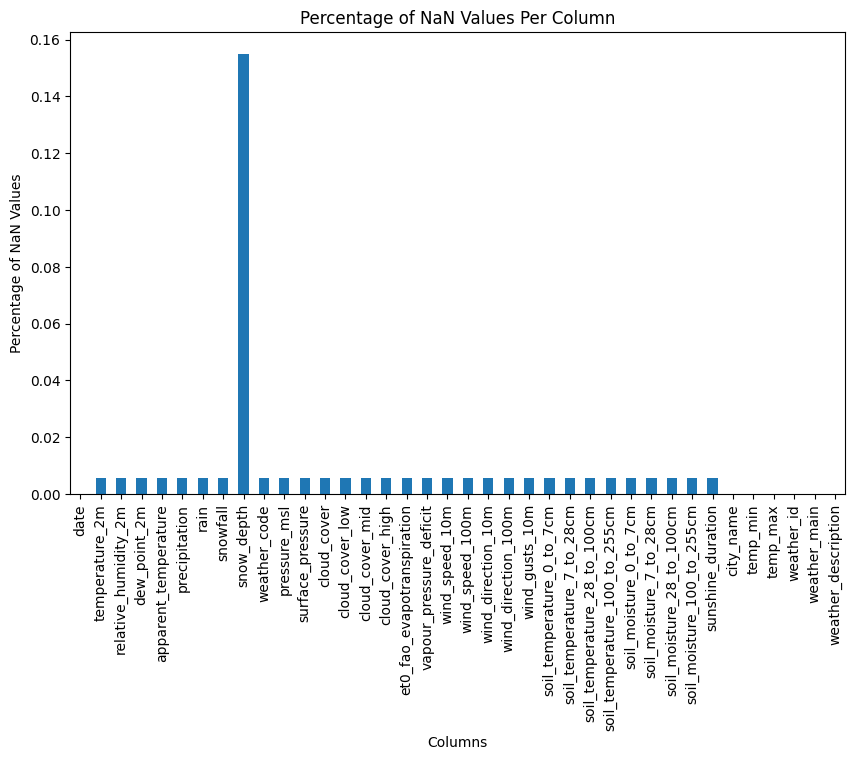

In [21]:
nan_distribution = (df.isna().sum() / len(df)) * 100
nan_distribution.plot(kind='bar', figsize=(10, 6), title='Percentage of NaN Values Per Column')
plt.ylabel('Percentage of NaN Values')
plt.xlabel('Columns')
plt.show();

In [22]:
#Filter out all entries from July 2024 onwards (to deal with missing snow_depth values)

df = df[df['date'] < '2024-07-01']

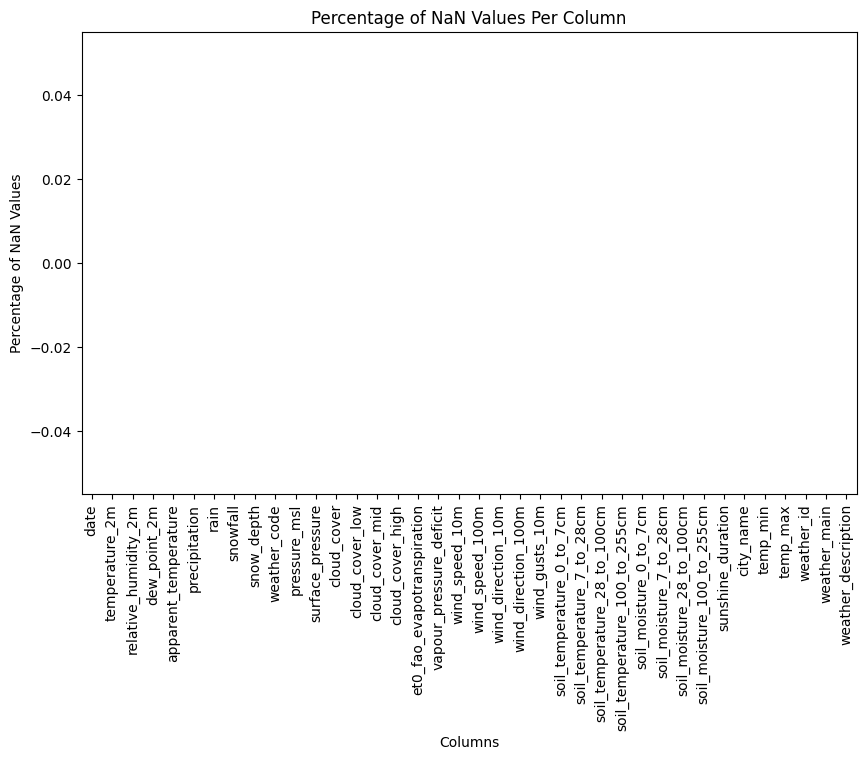

In [28]:
nan_distribution = (df.isna().sum() / len(df)) * 100
nan_distribution.plot(kind='bar', figsize=(10, 6), title='Percentage of NaN Values Per Column')
plt.ylabel('Percentage of NaN Values')
plt.xlabel('Columns')
plt.show();

In [23]:
df.tail(2)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration,city_name,temp_min,temp_max,weather_id,weather_main,weather_description
398995,2024-06-30 22:00:00+00:00,12.499001,100.000000,12.499001,12.977301,2.2,2.2,0.0,0.0,61.0,...,0.411,0.374,0.414,0.0,Hochfügen,282.86,285.69,501,Rain,moderate rain
398996,2024-06-30 23:00:00+00:00,12.199000,99.671715,12.149000,12.385004,1.0,1.0,0.0,0.0,55.0,...,0.414,0.374,0.414,0.0,Hochfügen,282.86,284.18,500,Rain,light rain


In [24]:
#Checking and dropping any duplicates duplicates
print(f'Number of rows = {len(df)}') # Check number of rows before removing duplicates

Number of rows = 398997


In [25]:
print(f'Number of duplicates = {df.duplicated().sum()}') # Compute the number of duplicated rows
df = df.drop_duplicates() # Remove duplicates
print(f'Number of rows (after dropping duplicates) = {len(df)}')

Number of duplicates = 0
Number of rows (after dropping duplicates) = 398997


# Data preprocessing 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398997 entries, 0 to 398996
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   date                           398997 non-null  datetime64[ns, UTC]
 1   temperature_2m                 398997 non-null  float64            
 2   relative_humidity_2m           398997 non-null  float64            
 3   dew_point_2m                   398997 non-null  float64            
 4   apparent_temperature           398997 non-null  float64            
 5   precipitation                  398997 non-null  float64            
 6   rain                           398997 non-null  float64            
 7   snowfall                       398997 non-null  float64            
 8   snow_depth                     398997 non-null  float64            
 9   weather_code                   398997 non-null  float64            
 10  pressure_msl 

In [27]:
X = df.drop('snowfall', axis=1)